In [1]:
import json
import numpy as np
import pandas as pd
import os

from scipy.ndimage import gaussian_filter1d

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18

In [2]:
with open("../qmof.json") as file:
    qmof_data = json.load(file)
    qmof_df = pd.json_normalize(qmof_data).set_index("qmof_id")


In [136]:
# qmof_id to name
qmof_id = "qmof-8a95c27"
s = qmof_df[qmof_df.index == qmof_id]["name"].item()
s

'ABACUF01_FSR'

In [3]:
# name to qmof_id
s = "FAVMIB_FSR"
qmof_id = qmof_df[qmof_df["name"] == s].index.item()
qmof_id

'qmof-0ab4ab7'

In [4]:
bandgap = qmof_df[qmof_df["name"]==s]["outputs.pbe.bandgap"].item()
vbm = qmof_df[qmof_df["name"]==s]["outputs.pbe.vbm"].item()
cbm = qmof_df[qmof_df["name"]==s]["outputs.pbe.cbm"].item()

In [5]:
print(bandgap)
print(vbm)
print(cbm)
print(cbm-vbm)

2.539011
0.079519
2.61853
2.539011


In [6]:
dos_path = os.path.join("../files/EIDyjluDQ3eZnt-gI7Fc4Q/vasp_files/", s, "DOSCAR")

In [7]:
with open(dos_path) as file:
    lines = file.readlines()
    nions = int(lines[0].split()[1])
    e_info = [float(i) for i in lines[5].split()]
    e_min, e_max, nedos, efermi = e_info[0], e_info[1], int(e_info[2]), e_info[3]

    dos_data = np.array([[float(x) for x in l.split()] for l in lines[6:6+nedos]])

    atom_line_idx = np.array([7+ion_idx+(ion_idx+1)*nedos for ion_idx in range(nions)])
    atom_dos_data = np.array([[[float(x) for x in l.split()] for l in lines[idx:idx+nedos]] for idx in atom_line_idx])

In [8]:
dos_data.shape

(301, 3)

In [9]:
dos_data_bg = dos_data[(dos_data[:,0] > efermi) & (dos_data[:,0] < efermi+bandgap)]
dos_data_bg.shape

(22, 3)

In [10]:
efermi

0.19101515

In [11]:
efermi+bandgap

2.73002615

In [33]:
dos_data[(dos_data[:,0] > efermi) & (dos_data[:,0] < efermi+bandgap)]

array([[2.780e-01, 0.000e+00, 3.080e+02],
       [3.930e-01, 0.000e+00, 3.080e+02],
       [5.090e-01, 0.000e+00, 3.080e+02],
       [6.250e-01, 0.000e+00, 3.080e+02],
       [7.400e-01, 0.000e+00, 3.080e+02],
       [8.560e-01, 0.000e+00, 3.080e+02],
       [9.720e-01, 0.000e+00, 3.080e+02],
       [1.087e+00, 0.000e+00, 3.080e+02],
       [1.203e+00, 0.000e+00, 3.080e+02],
       [1.318e+00, 0.000e+00, 3.080e+02],
       [1.434e+00, 0.000e+00, 3.080e+02],
       [1.550e+00, 0.000e+00, 3.080e+02],
       [1.665e+00, 0.000e+00, 3.080e+02],
       [1.781e+00, 0.000e+00, 3.080e+02],
       [1.897e+00, 0.000e+00, 3.080e+02],
       [2.012e+00, 0.000e+00, 3.080e+02],
       [2.128e+00, 0.000e+00, 3.080e+02],
       [2.244e+00, 0.000e+00, 3.080e+02],
       [2.359e+00, 0.000e+00, 3.080e+02],
       [2.475e+00, 0.000e+00, 3.080e+02],
       [2.590e+00, 2.037e-04, 3.080e+02],
       [2.706e+00, 1.332e-12, 3.087e+02]])

In [34]:
dos_data_bg[-1]

array([2.706e+00, 1.332e-12, 3.087e+02])

In [35]:
dos_data_bg

array([[2.780e-01, 0.000e+00, 3.080e+02],
       [3.930e-01, 0.000e+00, 3.080e+02],
       [5.090e-01, 0.000e+00, 3.080e+02],
       [6.250e-01, 0.000e+00, 3.080e+02],
       [7.400e-01, 0.000e+00, 3.080e+02],
       [8.560e-01, 0.000e+00, 3.080e+02],
       [9.720e-01, 0.000e+00, 3.080e+02],
       [1.087e+00, 0.000e+00, 3.080e+02],
       [1.203e+00, 0.000e+00, 3.080e+02],
       [1.318e+00, 0.000e+00, 3.080e+02],
       [1.434e+00, 0.000e+00, 3.080e+02],
       [1.550e+00, 0.000e+00, 3.080e+02],
       [1.665e+00, 0.000e+00, 3.080e+02],
       [1.781e+00, 0.000e+00, 3.080e+02],
       [1.897e+00, 0.000e+00, 3.080e+02],
       [2.012e+00, 0.000e+00, 3.080e+02],
       [2.128e+00, 0.000e+00, 3.080e+02],
       [2.244e+00, 0.000e+00, 3.080e+02],
       [2.359e+00, 0.000e+00, 3.080e+02],
       [2.475e+00, 0.000e+00, 3.080e+02],
       [2.590e+00, 2.037e-04, 3.080e+02],
       [2.706e+00, 1.332e-12, 3.087e+02]])

In [36]:
atom_dos_bg = atom_dos_data[(atom_dos_data[:,:,0] > efermi) & (atom_dos_data[:,:,0] < efermi+bandgap)]
atom_dos_bg = atom_dos_bg.reshape(
    atom_dos_data.shape[0],
    dos_data_bg.shape[0],
    atom_dos_data.shape[2]
)

In [37]:
atom_dos_bg.shape

(90, 22, 10)

In [38]:
atom_bg_sum = np.sum(atom_dos_bg, axis=2) - atom_dos_bg[:,:,0]

In [39]:
atom_bg_sum.shape

(90, 22)

In [40]:
energies = dos_data[:,0]

In [41]:
atom_dos_sum = np.sum(atom_dos_data, axis=2) - atom_dos_data[:,:,0]

In [42]:
useful_data = np.array([atom_dos_sum[id, :][(energies>efermi) & (energies<efermi+bandgap)] for id in range(atom_dos_sum.shape[0])])

In [43]:
useful_data.shape

(90, 22)

In [44]:
bandgap_data = dos_data[(dos_data[:,0] > efermi) & (dos_data[:,0]<efermi+bandgap)]#[:-1]
#bandgap_data = bandgap_data[:-1]

In [45]:
bandgap_data

array([[2.780e-01, 0.000e+00, 3.080e+02],
       [3.930e-01, 0.000e+00, 3.080e+02],
       [5.090e-01, 0.000e+00, 3.080e+02],
       [6.250e-01, 0.000e+00, 3.080e+02],
       [7.400e-01, 0.000e+00, 3.080e+02],
       [8.560e-01, 0.000e+00, 3.080e+02],
       [9.720e-01, 0.000e+00, 3.080e+02],
       [1.087e+00, 0.000e+00, 3.080e+02],
       [1.203e+00, 0.000e+00, 3.080e+02],
       [1.318e+00, 0.000e+00, 3.080e+02],
       [1.434e+00, 0.000e+00, 3.080e+02],
       [1.550e+00, 0.000e+00, 3.080e+02],
       [1.665e+00, 0.000e+00, 3.080e+02],
       [1.781e+00, 0.000e+00, 3.080e+02],
       [1.897e+00, 0.000e+00, 3.080e+02],
       [2.012e+00, 0.000e+00, 3.080e+02],
       [2.128e+00, 0.000e+00, 3.080e+02],
       [2.244e+00, 0.000e+00, 3.080e+02],
       [2.359e+00, 0.000e+00, 3.080e+02],
       [2.475e+00, 0.000e+00, 3.080e+02],
       [2.590e+00, 2.037e-04, 3.080e+02],
       [2.706e+00, 1.332e-12, 3.087e+02]])

In [46]:
bandgap_data[-1, 1] == 0

False

In [47]:
peak_in_bandgap_atom = []
for atom in range(atom_dos_data.shape[0]):
    peak_in_bandgap_atom.append(atom_dos_sum[atom,:][(dos_data[:,0] > efermi) & (dos_data[:,0]<efermi+bandgap)])

peak_in_bandgap_atom = np.array(peak_in_bandgap_atom)

In [48]:
peak_in_bandgap_atom

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.31017577e-09, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.30973701e-09, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.37336983e-09, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.41244003e-09, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.73641319e-08, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.73531141e-08, 0.00000000e+00]])

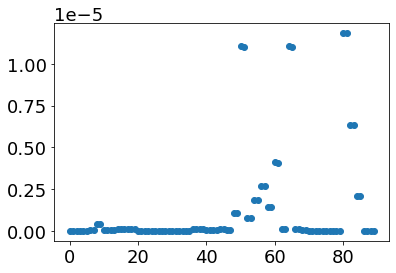

In [49]:
plt.scatter(range(atom_dos_data.shape[0]), np.sum(peak_in_bandgap_atom, axis=1))

In [50]:
np.max(dos_data[:, 1][(energies>efermi-1) & (energies<efermi+7)])

33.89

Text(0.5, 1.0, 'qmof-0ab4ab7')

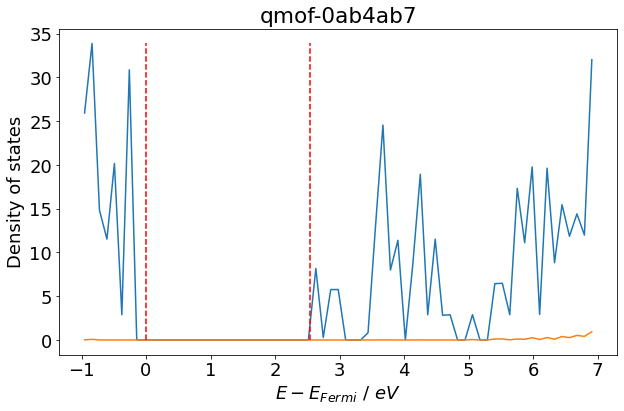

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(
    energies[(energies>efermi-1) & (energies<efermi+7)]-efermi,
    dos_data[:, 1][(energies>efermi-1) & (energies<efermi+7)], 
    #gaussian_filter1d(dos_data[:, 1][(energies>efermi-1) & (energies<efermi+7)], sigma=bandgap)
)
ax.plot(
    energies[(energies>efermi-1) & (energies<efermi+7)]-efermi, 
    atom_dos_sum[0,:][(energies>efermi-1) & (energies<efermi+7)]  
)
ax.plot([0,0], [0,np.max(dos_data[:, 1][(energies>efermi-1) & (energies<efermi+7)])], 'r--')
ax.plot([bandgap, bandgap], [0,np.max(dos_data[:, 1][(energies>efermi-1) & (energies<efermi+7)])], 'r--')
ax.set_xlabel("$E-E_{Fermi}\ /\ eV$")
ax.set_ylabel("Density of states")
ax.set_title("%s" %qmof_id)

# read qmofs with peaks in the bandgap

In [130]:
with open("../files/mofs_with_peaks") as f:
    mofs_peak = [l.split() for l in f.readlines()]

In [131]:
len(mofs_peak)

4357

In [133]:
qmof_id_peak = [qmof_df[qmof_df["name"] == q[0]].index.item() for q in mofs_peak]

In [134]:
len(qmof_id_peak)

4357

In [135]:
if "qmof-8a95c27" not in qmof_id_peak:
    print("yes")

yes


In [17]:
import shutil

In [20]:
for x in qmof_id_peak:
    src = os.path.join("/run/user/1001/gvfs/smb-share:server=lsmosrv2.epfl.ch,share=xiazhang/dos_plots", x+".png")
    dst = os.path.join("/run/user/1001/gvfs/smb-share:server=lsmosrv2.epfl.ch,share=xiazhang/dos_plots_peaks", x+".png")
    shutil.copyfile(src, dst)